In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
df = pd.read_csv('../original_data_sets/en_training.tsv', sep='\t')

In [5]:
df.head()

,id,text,misogynous,misogyny_category,target
0,1,Please tell me why the bitch next to me in the...,1,dominance,active
1,2,@emmasharp003 @Ldrake48Lee Bitch shut the fuck up,1,dominance,active
2,3,"@abzdafab Dear cunt, please shut the fuck up.",1,dominance,active
3,4,RT @queenofdragonsb: Pls shut the fuck up bitch,1,dominance,active
4,5,"RT @21bIvck: ""when u gonna get your license"" S...",1,dominance,active


## Distributions

In [6]:
# analysis of the distribution of tweets with respect to the variable 'misogynous'

df['misogynous'].value_counts()

0    2215
1    1785
Name: misogynous, dtype: int64

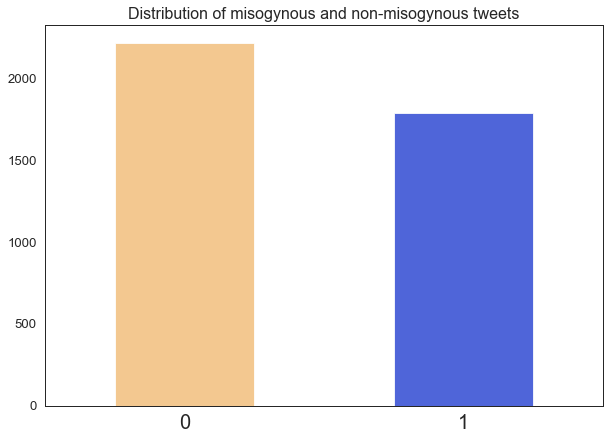

In [7]:
# visualization of the above distribution by means of a barplot

vals = list(df['misogynous'].unique())
colors=['#f3c890', '#4f65d9']

plt.rcParams["figure.figsize"] = [10,7]
sns.set_context("paper", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("white")

df['misogynous'].value_counts().plot(kind='bar',color=colors[:], title='Distribution of misogynous and non-misogynous tweets')
plt.xticks(fontsize=20, rotation=0)

plt.show()

In [8]:
# analysis of the distribution of tweets with respect to the variable 'misogyny_category' considering the original five classes

df['misogyny_category'].value_counts()

0                    2215
discredit            1014
sexual_harassment     352
stereotype            179
dominance             148
derailing              92
Name: misogyny_category, dtype: int64

In [9]:
df_mis = df[df['misogynous'] == 1]  # we isolate the misogynous tweets

In [10]:
# visualization of the above distribution by means of a barplot

ms_types =  df_mis.groupby([df['misogyny_category']]).size().reset_index().rename(columns={0:'count'})

In [11]:
ms_types = ms_types.sort_values(by='count', ascending=False)

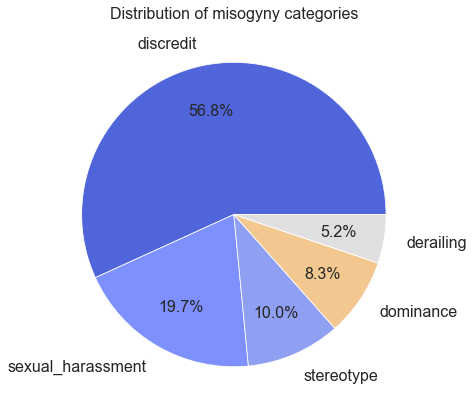

In [12]:
plt.pie(ms_types['count'], labels=ms_types['misogyny_category'], autopct='%1.1f%%', colors= ['#4f65d9','#7e8ffe','#8f9ff1', '#f3c890', '#dfdfdf'], pctdistance=0.7, labeldistance=1.15, textprops={'fontsize':16})
#plt.tight_layout()
plt.title("Distribution of misogyny categories")
plt.rcParams["figure.figsize"] = [8,8]
plt.show()

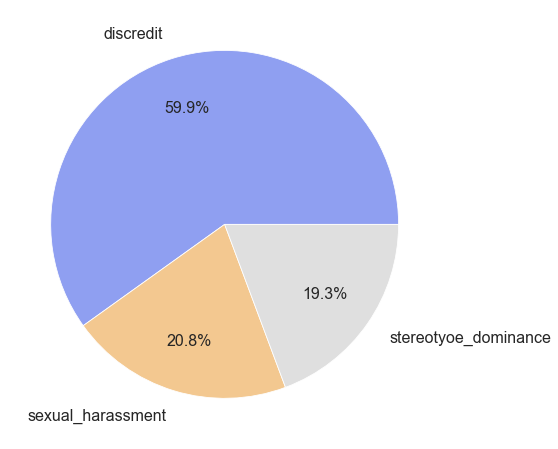

In [13]:
# analysis and visualization of the distribution of tweets with respect to the variable 'misogyny_category' 
# considering three classes ('discredit', 'sexual_harassment' and 'stereotype_dominance')

plt.pie([1014, 352, 327], labels= ['discredit', 'sexual_harassment', 'stereotyoe_dominance'], autopct='%1.1f%%', colors= ['#8f9ff1', '#f3c890', '#dfdfdf'], pctdistance=0.7, labeldistance=1.15, textprops={'fontsize':16})
#plt.tight_layout()
plt.rcParams["figure.figsize"] = [8,8]
plt.show()

In [14]:
# analysis and visualization of the distribution of tweets with respect to the variable 'misogyny_category' considering three 
# classes ('discredit', 'sexual_harassment' and 'stereotype_dominance') after the corrections that have been made to the 
# training set during the annotation of the professions (such improvements are explained at the end of Subsection 2.1)

In [15]:
# corrected_df is the new version of the trainin set resulting from the improvements mentioned in the previous cell
# it will be generated later in thi Notebook. We uploaded it here because it was interesting to see the differences
# in the distribution of the variables before and after the improvements

corrected_df = pd.read_csv('../data_sets/corrected_df.csv')

In [16]:
corrected_df['misogyny_category'].value_counts()

0                    2254
discredit             982
sexual_harassment     334
stereotype            176
dominance             145
derailing              90
Name: misogyny_category, dtype: int64

In [17]:
# the new version of the training set obviously is different from the previous w.r.t. the distributions of both "misogynousan"
# and "misogyny_category"

corrected_df['misogynous'].value_counts()

0    2254
1    1727
Name: misogynous, dtype: int64

In [18]:
corrected_df['misogyny_category'].value_counts()

0                    2254
discredit             982
sexual_harassment     334
stereotype            176
dominance             145
derailing              90
Name: misogyny_category, dtype: int64

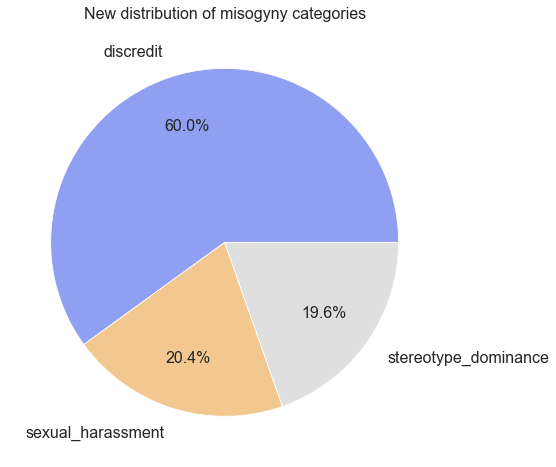

In [19]:
plt.pie([982, 334, 321], labels= ['discredit', 'sexual_harassment', 'stereotype_dominance'], autopct='%1.1f%%', colors= ['#8f9ff1', '#f3c890', '#dfdfdf'], pctdistance=0.7, labeldistance=1.15, textprops={'fontsize':16})
#plt.tight_layout()
plt.title("New distribution of misogyny categories")
plt.rcParams["figure.figsize"] = [8,8]
plt.show()

## Annotation of professions

In [20]:
# In order to ease the annotation, we decided to divide the tweets into two groups: the ones mentioning one or more users, 
# assuming that the first mention denotes the profile of the victim of misogyny (in reality, this did not always turned out
# to be true), and those without mentions

mentionre = re.compile(r'@[\w]+')

In [21]:
victims = []

In [22]:
for t in df_mis['text']:                   # if the tweet reports no mentions, we insert an empty string ('') in the list
    m = mentionre.search(t)                # victims; otherwise, we insert the first mention found
    if m:
        victims.append(m.group())
    else:
        victims.append('')

In [23]:
#victims

In [24]:
df_mis['victim'] = victims                 # we append the above list to the df

C:\Users\aldoc\AppData\Local\Temp\ipykernel_23812\3975547218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mis['victim'] = victims                 # we append the above list to the df


In [25]:
# we create the two different dasets and export them in '.xlsx' format in order to make the annotation in Excel 
# These dataset available in the folder 'data_sets'

df_only_men = df_mis[df_mis['victim'] != '']
df_no_men = df_mis[df_mis['victim'] == '']

In [26]:
# df_only_men.to_excel('df_only_men.xlsx', index=False)
# df_no_men.to_excel('df_no_men.xlsx', index=False)

### Dataset correction

In [27]:
# both 'df_only_men.xlsx' 'df_no_men.xlsx' have been annotated with professions. As mentioned, this process allowed us to
# discover and correct some incoerences across the original training set. In particular:
# 1. Tweets that had been considered misogynous but actually are not, have been marked with the string 'mod' (modify). Their
#    annotation must be changed into the one of 'non-misogynous' tweets
# 2. Tweets reporting song titles and/ore lyrics are considered not misogynous and are deleted from the dataset

In [28]:
df_corr = df.copy()

In [29]:
# These two datasets are the annotated versions of the previously exported ones. They are available in the folder 'data_sets'

df_mentions = pd.read_excel('../data_sets/df_only_men_annot.xlsx',) 
df_no_mentions = pd.read_excel('../data_sets/df_no_men_annot.xlsx') 

In [30]:
# we make the explained corrections

def correct(d, d1):
    for i in d1.index:
        if d1["action"][i] == 'mod':
            id_tweet = d1["id"][i]
            d.loc[d['id'] == id_tweet, ['misogynous', 'misogyny_category', 'target']] = 0
        if d1["action"][i] == 'del':
            id_tweet = d1["id"][i]
            d.drop(d.loc[d['id'] == id_tweet].index, inplace=True)
    d = d.reset_index(drop=True, inplace=True)
            
correct(df_corr, df_mentions)
correct(df_corr, df_no_mentions)

In [31]:
#df_corr

In [32]:
# Distribution of tweets w.r.t. the variable 'misogynous' after the correction

df_corr['misogynous'].value_counts()

0    2254
1    1727
Name: misogynous, dtype: int64

In [33]:
# here we export the dataset that we mentioned before. It is available in the folder 'data_sets'

# df_corr.to_csv('corrected_df.csv', index=False)

### Dataset annotation with professions

In [34]:
# we transfer on the dataframe 'df_corr' the labels related to professions assigned in Excel

for i in df_mentions.index:
    if df_mentions["action"][i] != 'del':
        id_tweet = df_mentions["id"][i]
        df_corr.loc[df_corr['id'] == id_tweet, 'occupation'] = df_mentions['occupation'][i]

In [35]:
for i in df_no_mentions.index:
    if df_no_mentions["action"][i] != 'del':
        id_tweet = df_no_mentions["id"][i]
        df_corr.loc[df_corr['id'] == id_tweet, 'occupation'] = df_no_mentions['occupation'][i]

In [36]:
# the column occupation has a lot of NaN, corresponding to the non-misogynous tweets. We fill them with 0 (coherently with)
# the other levels of annotation w.r.t. 'non-misogynous' tweet

df_corr['occupation'].fillna(0, inplace = True)

In [37]:
#df_corr

In [38]:
# distribution of the labels introduced during the annotation of professions, as explained in the Subsection 2.1 of the report

df_corr['occupation'].value_counts()

0            2254
generic_r     760
generic_g     696
pol_act        97
show           87
no_woman       35
sci_cul        21
other          18
sport           7
arts            6
Name: occupation, dtype: int64

In [39]:
# the new dataset (corrected and annotated with professions) is exported. It is available in the folder 'data_sets'

#df_corr.to_csv("final_df.csv", sep=",", index=False)